In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
sns.set_theme(style='ticks', palette='deep')

In [4]:
pd.options.display.float_format = '{:.2f}'.format

In [5]:
d1 = pd.read_csv('../data/D1.csv', low_memory=False)

In [6]:
d1

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,length_of_stay,...,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,insulin,change,diabetesMed,readmitted,single_day_admission
0,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,No,Steady,No,No,Steady,Ch,Yes,NO,No
1,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,No,No,No,No,Steady,Ch,Yes,NO,No
2,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,No,Steady,No,No,Steady,Ch,Yes,NO,Yes
3,28236,89869032,AfricanAmerican,Female,[40-50),?,1,1,7,9,...,No,No,No,No,No,Steady,No,Yes,>30,No
4,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,No,No,No,No,Steady,No,Yes,>30,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50026,150712854,54487647,AfricanAmerican,Male,[60-70),?,2,1,1,8,...,No,No,No,No,No,Steady,Ch,Yes,>30,No
50027,150713208,99665856,Caucasian,Male,[70-80),?,2,1,1,1,...,No,No,No,No,No,No,No,No,NO,Yes
50028,150715134,46894068,Caucasian,Male,[60-70),?,2,1,1,5,...,No,No,No,No,No,No,No,No,NO,No
50029,150715788,86575536,Caucasian,Male,[70-80),?,1,3,1,5,...,No,No,No,Steady,No,No,No,Yes,<30,No


In [7]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50031 entries, 0 to 50030
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              50031 non-null  int64 
 1   patient_nbr               50031 non-null  int64 
 2   race                      50031 non-null  object
 3   gender                    50031 non-null  object
 4   age                       50031 non-null  object
 5   weight                    50031 non-null  object
 6   admission_type_id         50031 non-null  int64 
 7   discharge_disposition_id  50031 non-null  int64 
 8   admission_source_id       50031 non-null  int64 
 9   length_of_stay            50031 non-null  int64 
 10  payer_code                50031 non-null  object
 11  medical_specialty         50031 non-null  object
 12  num_lab_procedures        50031 non-null  int64 
 13  num_procedures            50031 non-null  int64 
 14  num_medications       

#### Create a function to convert all object columns to 'string' type

In [8]:
def convert_object_to_string(df):
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('string')
    return df


d1 = convert_object_to_string(d1)

In [9]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50031 entries, 0 to 50030
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              50031 non-null  int64 
 1   patient_nbr               50031 non-null  int64 
 2   race                      50031 non-null  string
 3   gender                    50031 non-null  string
 4   age                       50031 non-null  string
 5   weight                    50031 non-null  string
 6   admission_type_id         50031 non-null  int64 
 7   discharge_disposition_id  50031 non-null  int64 
 8   admission_source_id       50031 non-null  int64 
 9   length_of_stay            50031 non-null  int64 
 10  payer_code                50031 non-null  string
 11  medical_specialty         50031 non-null  string
 12  num_lab_procedures        50031 non-null  int64 
 13  num_procedures            50031 non-null  int64 
 14  num_medications       

In [10]:
d1.race.value_counts(dropna=False)

race
Caucasian          35732
AfricanAmerican    11149
?                   1257
Hispanic            1020
Other                610
Asian                263
Name: count, dtype: Int64

#### Replace the '?' values in the numeric columns with 'NaN'

In [11]:
d1['number_inpatient'] = d1['number_inpatient'].replace('?', np.nan).astype('Int64')
d1['number_outpatient'] = d1['number_outpatient'].replace('?', np.nan).astype('Int64')
d1['number_emergency'] = d1['number_emergency'].replace('?', np.nan).astype('Int64')



In [12]:
# This code shows the patient_nbr with the highest number of encounters. This will be important for data handling at the modelling stage. 
d1.patient_nbr.value_counts(dropna=False)

patient_nbr
1660293     23
23643405    22
3401055     18
3481272     18
23199021    18
            ..
25023510     1
15082812     1
3282282      1
20331072     1
83582352     1
Name: count, Length: 38257, dtype: int64

In [13]:
# This is an example of a patient with multiple encounters in the dataset. Note that the number of encounters is not the same as the sum of the number_inpatient, number_outpatient, and number_emergency columns. You test this by running: 

# d1.loc[d1.patient_nbr == 1660293, ['number_inpatient', 'number_outpatient', 'number_emergency']].sum()
d1.loc[d1.patient_nbr == 1660293]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,length_of_stay,...,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,insulin,change,diabetesMed,readmitted,single_day_admission
269,2967810,1660293,Caucasian,Female,[60-70),?,6,25,7,10,...,No,No,No,No,No,Steady,No,Yes,>30,No
944,7216812,1660293,Caucasian,Female,[60-70),?,6,25,7,4,...,No,No,No,No,No,Steady,No,Yes,<30,No
1077,7977342,1660293,Caucasian,Female,[60-70),?,1,1,7,12,...,No,No,No,No,No,Down,Ch,Yes,<30,No
1349,9358128,1660293,Caucasian,Female,[60-70),?,1,1,7,8,...,No,No,No,No,No,Steady,No,Yes,>30,No
2954,18844260,1660293,Caucasian,Female,[60-70),?,1,1,7,3,...,No,No,No,No,No,Up,Ch,Yes,>30,No
3510,21616398,1660293,Caucasian,Female,[60-70),?,1,1,7,3,...,No,No,No,No,No,Down,Ch,Yes,>30,No
6780,33120744,1660293,Caucasian,Female,[60-70),?,2,1,1,9,...,No,No,No,No,No,Up,Ch,Yes,<30,No
7704,36030504,1660293,Caucasian,Female,[60-70),?,2,1,1,5,...,No,No,No,No,No,Steady,No,Yes,<30,No
8547,38486058,1660293,Caucasian,Female,[60-70),?,1,1,7,2,...,No,No,No,No,No,Up,Ch,Yes,<30,No
8972,39749172,1660293,Caucasian,Female,[60-70),?,2,1,1,4,...,No,No,No,No,No,Steady,No,Yes,>30,No


### Task 2 - Data exploration

- Make histograms of the numerical variables

<Axes: xlabel='num_lab_procedures', ylabel='Count'>

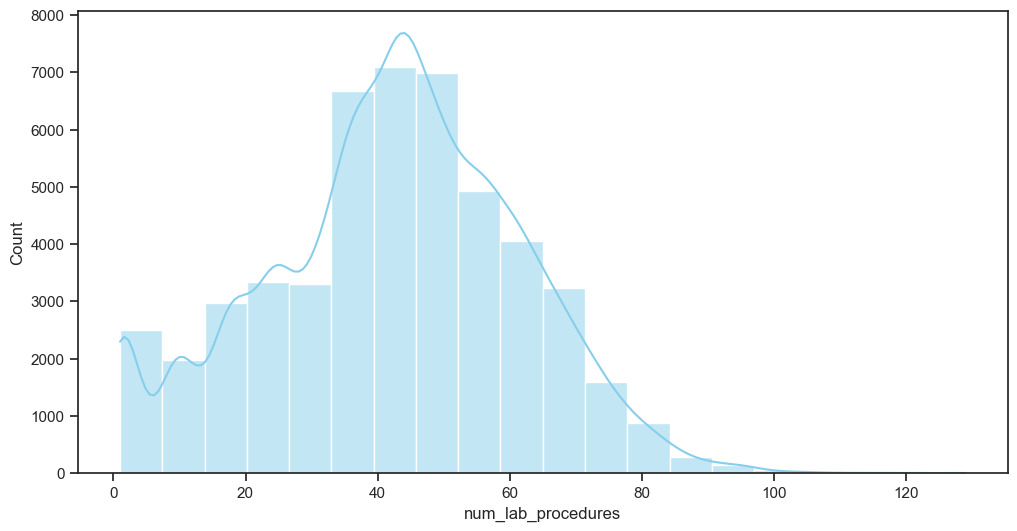

In [14]:
# make boxplots of the numerical variables
plt.figure(figsize=(12, 6))
sns.histplot(data=d1['num_lab_procedures'], kde=True, color='skyblue', bins=20)


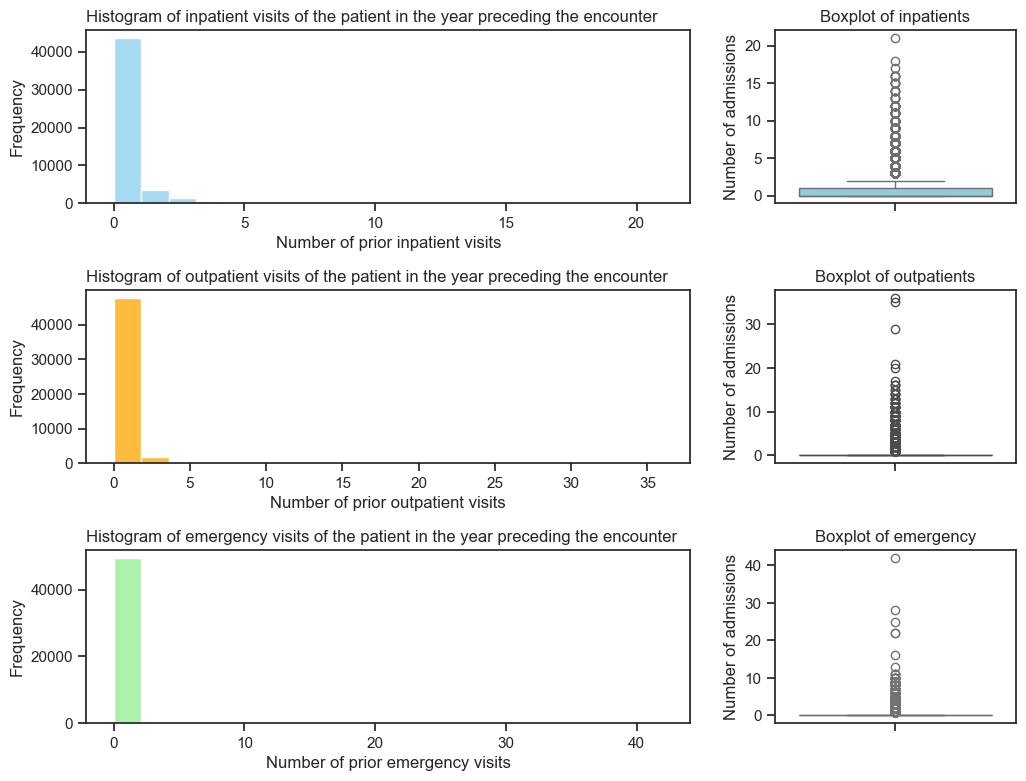

In [101]:
# Set up the figure and axes in a 3 rows, 2 columns grid. Histograms will be on the left and boxplots on the right
# Set the width ratio of the two columns as 2.5 and 1 to make the histogram wider than the boxplot
fig, axes = plt.subplots(3, 2, figsize=(12, 9), gridspec_kw={'width_ratios': [2.5, 1]})

# Histogram and boxplot of the number of inpatient visits 
sns.histplot(data=d1['number_inpatient' ], ax=axes[0,0] ,bins = 20, color='skyblue')
axes[0,0].set_title(f'Histogram of inpatient visits of the patient in the year preceding the encounter', loc='left')
axes[0,0].set_xlabel('Number of prior inpatient visits')
axes[0,0].set_ylabel('Frequency')

sns.boxplot(data=d1['number_inpatient'], ax=axes[0,1] ,color='skyblue')
axes[0,1].set_title(f'Boxplot of inpatients')
axes[0,1].set_ylabel('Number of admissions')

# Histogram and boxplot of the number of outpatient visits
sns.histplot(data=d1['number_outpatient' ], ax=axes[1,0] ,bins = 20, color='orange')
axes[1,0].set_title(f'Histogram of outpatient visits of the patient in the year preceding the encounter', loc='left')
axes[1,0].set_xlabel('Number of prior outpatient visits')
axes[1,0].set_ylabel('Frequency')

sns.boxplot(data=d1['number_outpatient'], ax=axes[1,1] ,color='orange')
axes[1,1].set_title(f'Boxplot of outpatients')
axes[1,1].set_ylabel('Number of admissions')

# Histogram and boxplot of the number of emergency visits
sns.histplot(data=d1['number_emergency' ], ax=axes[2,0] ,bins = 20,  color='lightgreen')
axes[2,0].set_title(f'Histogram of emergency visits of the patient in the year preceding the encounter', loc='left')
axes[2,0].set_xlabel('Number of prior emergency visits')
axes[2,0].set_ylabel('Frequency')

sns.boxplot(data=d1['number_emergency'], ax=axes[2,1] ,color='lightgreen')
axes[2,1].set_title(f'Boxplot of emergency')
axes[2,1].set_ylabel('Number of admissions')

# Add space between the plots to prevent overlap of titles and labels
plt.subplots_adjust(hspace=0.5)


In [77]:
# calculate the proportions each of the variables
inpatient_percentage = d1['number_inpatient'].value_counts(normalize=True, dropna='False').rename('Inpatients %') * 100
outpatient_percentage = d1['number_outpatient'].value_counts(normalize=True, dropna='False').rename('Outpatients %') * 100
emergency_percentage = d1['number_emergency'].value_counts(normalize=True, dropna='False').rename('Emergency %') * 100

# Combine them into one df
percentages_table = pd.concat([inpatient_percentage, outpatient_percentage, emergency_percentage], axis=1)

# Give the axis a meaningful name
percentages_table.index.name = 'Number of visits'
percentages_table

,Inpatients %,Outpatients %,Emergency %
Number of visits,,,
0,68.52,88.89,92.44
1,18.44,6.25,5.26
2,6.85,2.18,1.29
3,3.02,1.27,0.46
4,1.43,0.67,0.26
5,0.71,0.35,0.09
6,0.42,0.13,0.05
7,0.24,0.06,0.05
8,0.13,0.06,0.03


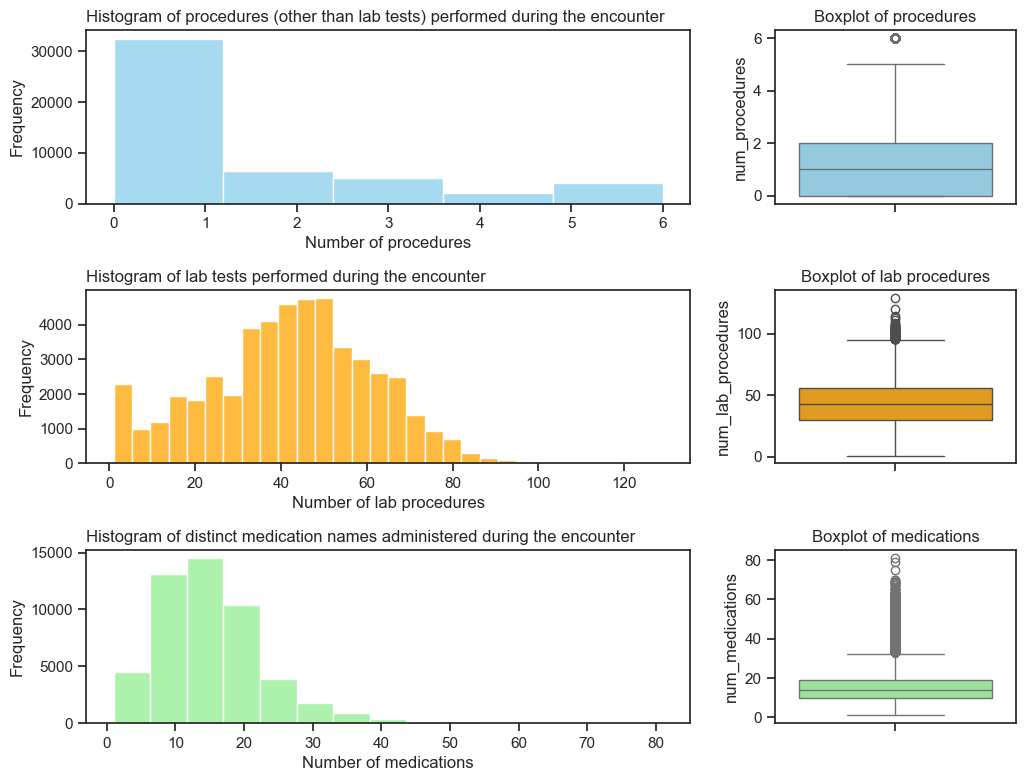

In [100]:

fig, axes = plt.subplots(3, 2, figsize=(12, 9), gridspec_kw={'width_ratios': [2.5, 1]})

sns.histplot(data=d1['num_procedures' ], ax=axes[0,0] ,bins = 5, color='skyblue')
axes[0,0].set_title('Histogram of procedures (other than lab tests) performed during the encounter', loc='left')
axes[0,0].set_xlabel('Number of procedures')
axes[0,0].set_ylabel('Frequency')

sns.boxplot(data=d1['num_procedures'], ax=axes[0,1] ,color='skyblue')
axes[0,1].set_title(f'Boxplot of procedures')


sns.histplot(data=d1['num_lab_procedures' ], ax=axes[1,0] ,bins = 30, color='orange')
axes[1,0].set_title('Histogram of lab tests performed during the encounter', loc='left')
axes[1,0].set_xlabel('Number of lab procedures')
axes[1,0].set_ylabel('Frequency')

sns.boxplot(data=d1['num_lab_procedures'], ax=axes[1,1] ,color='orange')
axes[1,1].set_title(f'Boxplot of lab procedures')

sns.histplot(data=d1['num_medications' ], ax=axes[2,0] ,bins = 15,  color='lightgreen')
axes[2,0].set_title('Histogram of distinct medication names administered during the encounter', loc='left')
axes[2,0].set_xlabel('Number of medications')
axes[2,0].set_ylabel('Frequency')


sns.boxplot(data=d1['num_medications'], ax=axes[2,1] ,color='lightgreen')
axes[2,1].set_title(f'Boxplot of medications')


plt.subplots_adjust(hspace=0.5)

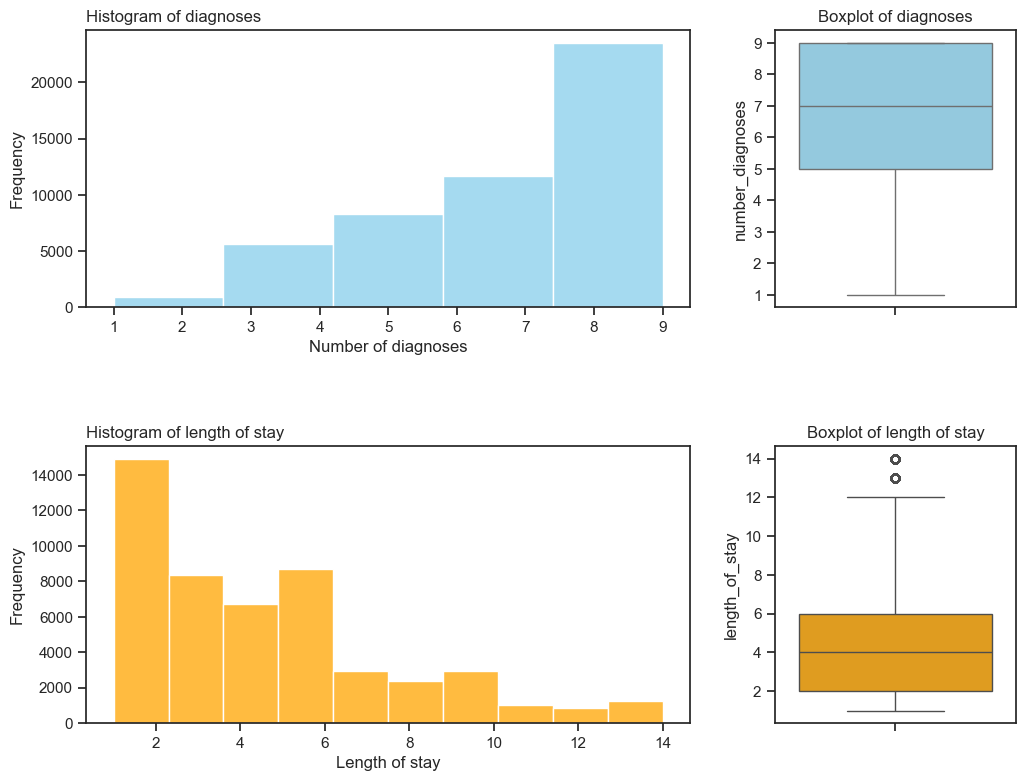

In [98]:
fig, axes = plt.subplots(2, 2, figsize=(12, 9), gridspec_kw={'width_ratios': [2.5, 1]})

sns.histplot(data=d1['number_diagnoses' ], ax=axes[0,0] ,bins = 5, color='skyblue')
axes[0,0].set_title('Histogram of diagnoses', loc='left')
axes[0,0].set_xlabel('Number of diagnoses')
axes[0,0].set_ylabel('Frequency')

sns.boxplot(data=d1['number_diagnoses'], ax=axes[0,1] ,color='skyblue')
axes[0,1].set_title(f'Boxplot of diagnoses')

sns.histplot(data=d1['length_of_stay' ], ax=axes[1,0] ,bins = 10, color='orange')
axes[1,0].set_title('Histogram of length of stay', loc='left')
axes[1,0].set_xlabel('Length of stay')
axes[1,0].set_ylabel('Frequency')

sns.boxplot(data=d1['length_of_stay'], ax=axes[1,1] ,color='orange')
axes[1,1].set_title(f'Boxplot of length of stay')

plt.subplots_adjust(hspace=0.5)

In [23]:
d1.age.value_counts(dropna=False)

age
[70-80)     13109
[60-70)     10874
[50-60)      8775
[80-90)      7530
[40-50)      5064
[30-40)      2053
[90-100)     1178
[20-30)       842
[10-20)       468
[0-10)        138
Name: count, dtype: Int64

In [24]:
d1_copy = d1.copy(deep=True)

In [25]:
age_categories = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)',
                  '[90-100)']

In [26]:
d1_copy['age'] = pd.Categorical(d1_copy['age'], categories=age_categories, ordered=True)

In [27]:
d1_copy['age'].value_counts(dropna=False).sort_index()

age
[0-10)        138
[10-20)       468
[20-30)       842
[30-40)      2053
[40-50)      5064
[50-60)      8775
[60-70)     10874
[70-80)     13109
[80-90)      7530
[90-100)     1178
Name: count, dtype: int64

In [28]:
weight_categories = ['?', '[0-25)', '[25-50)', '[50-75)', '[75-100)', '[100-125)', '[125-150)', '[150-175)',
                     '[175-200)', '>200']

In [29]:
d1_copy['weight'] = pd.Categorical(d1_copy['weight'], categories=weight_categories, ordered=True)

In [30]:
d1_copy['weight'].value_counts(dropna=False).sort_index()

weight
?            48169
[0-25)          37
[25-50)         68
[50-75)        550
[75-100)       794
[100-125)      316
[125-150)       73
[150-175)       17
[175-200)        6
>200             1
Name: count, dtype: int64

In [31]:
d1.number_emergency.value_counts(dropna=False)

number_emergency
0       46185
1        2629
2         644
3         232
4         132
<NA>       69
5          45
6          27
7          24
8          16
9          10
10          8
11          3
22          2
25          1
13          1
42          1
16          1
28          1
Name: count, dtype: Int64

Make a copy of the original dataframe to correct the mismatched variables

Fix up the mismatched data

In [32]:
d1[['number_outpatient', 'number_emergency', 'number_inpatient']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50031 entries, 0 to 50030
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   number_outpatient  50011 non-null  Int64
 1   number_emergency   49962 non-null  Int64
 2   number_inpatient   50016 non-null  Int64
dtypes: Int64(3)
memory usage: 1.3 MB


### Skewness of integer variables

In [33]:
d1_copy[['number_outpatient', 'number_emergency', 'number_inpatient']].skew()

number_outpatient    9.31
number_emergency    16.58
number_inpatient     3.74
dtype: Float64

In [34]:
d1_copy['number_inpatient'].value_counts(normalize=True, dropna=False) * 100

number_inpatient
0      68.50
1      18.44
2       6.85
3       3.01
4       1.43
5       0.71
6       0.42
7       0.24
8       0.13
9       0.09
10      0.05
11      0.03
<NA>    0.03
12      0.02
13      0.01
14      0.01
16      0.01
15      0.01
17      0.00
21      0.00
18      0.00
Name: proportion, dtype: Float64

In [35]:
d1_copy['number_diagnoses'].value_counts(normalize=True, dropna=False) * 100

number_diagnoses
9   35.49
5   16.52
6   11.94
7   11.48
8   11.41
4    7.35
3    3.93
2    1.54
1    0.34
Name: proportion, dtype: float64

In [36]:
d1_copy['num_lab_procedures'].value_counts(normalize=True, dropna=False) * 100

num_lab_procedures
43    2.96
1     2.65
44    2.60
45    2.40
46    2.26
      ... 
129   0.00
107   0.00
108   0.00
109   0.00
120   0.00
Name: proportion, Length: 114, dtype: float64

In [37]:
d1_copy['num_medications'].value_counts(normalize=True, dropna=False).sort_index()

num_medications
1    0.00
2    0.01
3    0.01
4    0.02
5    0.02
     ... 
69   0.00
70   0.00
75   0.00
79   0.00
81   0.00
Name: proportion, Length: 73, dtype: float64

In [38]:
# cut the num_medications variable into bins with labesl [0 - 10), [10 - 20), [20 - 30), [30 - 40), [>40))
pd.cut(d1_copy['num_medications'], bins=[0, 10, 20, np.inf], labels=['[0-10)', '[10-20)', '[>30)']).value_counts(
    normalize=True, dropna=False).sort_index() * 100

num_medications
[0-10)    29.24
[10-20)   50.67
[>30)     20.08
Name: proportion, dtype: float64

<Axes: xlabel='number_inpatient', ylabel='Count'>

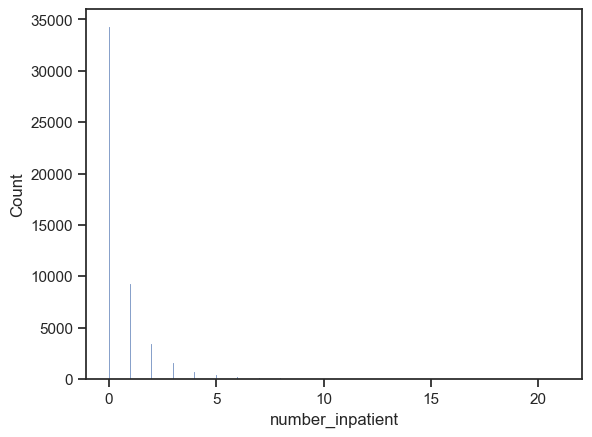

In [39]:
# make a frequency histogram of the number_outpatient variable using seaborn
sns.histplot(d1_copy['number_inpatient'])


In [40]:
len(np.unique(d1[['patient_nbr']]))

38257

In [41]:
len(d1)

50031

### Task 2 - EDA

In [42]:
def categorize_diagnosis(code):
    code_str = str(code)

    # Check for specific prefixes 'V' and 'E'
    if 'V' in code_str or 'E' in code_str:
        return 'other'

    # Convert the code to a numeric value
    try:
        code_num = int(float(code_str))
    except ValueError:
        return 'other'

    # Categorize based on the numeric value
    if 390 <= code_num < 460:
        return 'circulatory'
    elif 460 <= code_num < 520:
        return 'respiratory'
    elif 520 <= code_num < 580:
        return 'digestive'
    elif code_num == 250:
        return 'diabetes'
    elif 800 <= code_num < 1000:
        return 'injury'
    elif 710 <= code_num < 740:
        return 'musculoskeletal'
    elif 580 <= code_num < 630:
        return 'genitourinary'
    elif 140 <= code_num < 240:
        return 'neoplasms'
    elif 630 <= code_num < 680:
        return 'pregnancy'
    else:
        return 'other'


# Apply the function to the 'diag_1' column in the DataFrame
d1_copy['diag1_cats'] = d1_copy['diag_1'].apply(categorize_diagnosis)



In [43]:
d1_copy['diag1_cats'].value_counts()

diag1_cats
circulatory        16036
other              10753
diabetes            4558
respiratory         4527
digestive           4387
injury              3205
musculoskeletal     2419
genitourinary       2110
neoplasms           1702
pregnancy            334
Name: count, dtype: int64

In [44]:
categories = [
    (range(1, 139), 'infectious and parasitic diseases'),
    (range(140, 239), 'neoplasms'),
    (range(240, 279), 'endocrine, nutritional and metabolic diseases, and immunity disorders'),
    (range(280, 289), 'diseases of the blood and blood-forming organs'),
    (range(290, 319), 'mental disorders'),
    (range(320, 389), 'diseases of the nervous system and sense organs'),
    (range(390, 459), 'diseases of the circulatory system'),
    (range(460, 519), 'diseases of the respiratory system'),
    (range(520, 579), 'diseases of the digestive system'),
    (range(580, 629), 'diseases of the genitourinary system'),
    (range(630, 679), 'complications of pregnancy, childbirth, and the puerperium'),
    (range(680, 709), 'diseases of the skin and subcutaneous tissue'),
    (range(710, 739), 'diseases of the musculoskeletal system and connective tissue'),
    (range(740, 759), 'congenital anomalies'),
    (range(760, 779), 'certain conditions originating in the perinatal period'),
    (range(780, 799), 'symptoms, signs, and ill-defined conditions'),
    (range(800, 999), 'injury and poisoning')
]

In [45]:
def diagnosis_categories(code):
    if not isinstance(code, str):
        return
    if 'V' in code or 'E' in code:
        return 'Supplementary'
    if code == 'Unknown' or code == '?':
        return 'Unknown'

    code = float(code)
    for code_range, description in categories:
        if code in code_range:
            return description
        else:
            return 'Unknown'

In [46]:
d1_copy['diag_1'].apply(diagnosis_categories)

0        Unknown
1        Unknown
2        Unknown
3        Unknown
4        Unknown
          ...   
50026    Unknown
50027    Unknown
50028    Unknown
50029    Unknown
50030    Unknown
Name: diag_1, Length: 50031, dtype: object

In [47]:
d1

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,length_of_stay,...,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,insulin,change,diabetesMed,readmitted,single_day_admission
0,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,No,Steady,No,No,Steady,Ch,Yes,NO,No
1,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,No,No,No,No,Steady,Ch,Yes,NO,No
2,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,No,Steady,No,No,Steady,Ch,Yes,NO,Yes
3,28236,89869032,AfricanAmerican,Female,[40-50),?,1,1,7,9,...,No,No,No,No,No,Steady,No,Yes,>30,No
4,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,No,No,No,No,Steady,No,Yes,>30,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50026,150712854,54487647,AfricanAmerican,Male,[60-70),?,2,1,1,8,...,No,No,No,No,No,Steady,Ch,Yes,>30,No
50027,150713208,99665856,Caucasian,Male,[70-80),?,2,1,1,1,...,No,No,No,No,No,No,No,No,NO,Yes
50028,150715134,46894068,Caucasian,Male,[60-70),?,2,1,1,5,...,No,No,No,No,No,No,No,No,NO,No
50029,150715788,86575536,Caucasian,Male,[70-80),?,1,3,1,5,...,No,No,No,Steady,No,No,No,Yes,<30,No
